In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
games_df = pd.read_csv("games.csv")
player_play_df = pd.read_csv("player_play.csv")
players_df = pd.read_csv("players.csv")
plays_df = pd.read_csv("plays.csv")

In [3]:
games_df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [4]:
games_df.columns

Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr', 'homeFinalScore',
       'visitorFinalScore'],
      dtype='object')

In [5]:
player_play_df.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
player_play_df.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [7]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [8]:
players_df.columns

Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName', 'position',
       'displayName'],
      dtype='object')

In [9]:
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [10]:
plays_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

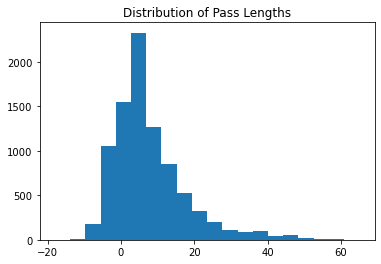

In [11]:
pass_lengths = plays_df["passLength"].copy()
pass_lengths = pass_lengths.dropna()
plt.hist(pass_lengths, bins=20)
plt.title("Distribution of Pass Lengths")
plt.show()

In [12]:
np.mean(pass_lengths)

7.627320650928261

In [13]:
np.median(pass_lengths)

5.0

In [14]:
np.std(pass_lengths)

10.104065706199037

In [15]:
pct_short_pass = sum(pass_lengths <= 5)/len(pass_lengths)
pct_med_pass = sum((pass_lengths > 5) & (pass_lengths < 20))/len(pass_lengths)
pct_long_pass = sum(pass_lengths >= 20)/len(pass_lengths)

In [16]:
pct_short_pass

0.5315150126060051

In [17]:
pct_med_pass

0.35858354343341736

In [18]:
pct_long_pass

0.10990144396057759

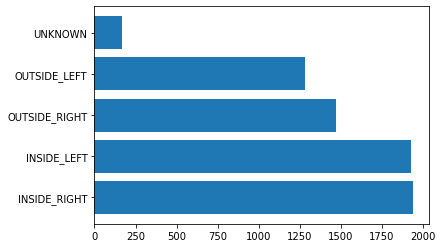

In [19]:
rush_location = plays_df["rushLocationType"].copy()
rush_location = rush_location.dropna()
r_loc_x_ind = ['INSIDE_RIGHT', 'INSIDE_LEFT', 'OUTSIDE_RIGHT', 'OUTSIDE_LEFT', 'UNKNOWN']
plt.barh(r_loc_x_ind, rush_location.value_counts())
plt.show()

In [20]:
pct_uk = rush_location.value_counts()['UNKNOWN']/len(rush_location)
pct_ol = rush_location.value_counts()['OUTSIDE_LEFT']/len(rush_location)
pct_or = rush_location.value_counts()['OUTSIDE_RIGHT']/len(rush_location)
pct_il = rush_location.value_counts()['INSIDE_LEFT']/len(rush_location)
pct_ir = rush_location.value_counts()['INSIDE_RIGHT']/len(rush_location)

In [21]:
pct_uk

0.024307601649970537

In [22]:
pct_ol

0.18901001767825573

In [23]:
pct_or

0.2165586328815557

In [24]:
pct_il

0.2841779611078374

In [25]:
pct_ir

0.2859457866823807

In [26]:
pass_run_plays_df = plays_df[["passLength", "rushLocationType"]]
pass_run_plays_df.head()

,passLength,rushLocationType
0,6.0,NaN
1,4.0,NaN
2,-4.0,NaN
3,-6.0,NaN
4,NaN,INSIDE_LEFT


In [27]:
def pass_categorize(l):
    l = float(l)
    if l <= 5:
        return 'SHORT'
    elif l > 5 and l < 20:
        return 'MEDIUM'
    elif l >= 20:
        return 'LONG'
    else:
        return l

In [28]:
pass_run_plays_df['passLength'] = pass_run_plays_df['passLength'].apply(pass_categorize)

/var/folders/43/v_cnfjxd11q3dmtp_tbzws700000gn/T/ipykernel_38990/501007400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_run_plays_df['passLength'] = pass_run_plays_df['passLength'].apply(pass_categorize)


In [29]:
pass_run_plays_df.head()

,passLength,rushLocationType
0,MEDIUM,NaN
1,SHORT,NaN
2,SHORT,NaN
3,SHORT,NaN
4,NaN,INSIDE_LEFT


In [30]:
pass_run_plays_df["playType"] = pass_run_plays_df['passLength'].combine_first(pass_run_plays_df['rushLocationType'])
pass_run_plays_df.dropna(subset=['playType'])
pass_run_plays_df.head()

/var/folders/43/v_cnfjxd11q3dmtp_tbzws700000gn/T/ipykernel_38990/4168206111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_run_plays_df["playType"] = pass_run_plays_df['passLength'].combine_first(pass_run_plays_df['rushLocationType'])


,passLength,rushLocationType,playType
0,MEDIUM,NaN,MEDIUM
1,SHORT,NaN,SHORT
2,SHORT,NaN,SHORT
3,SHORT,NaN,SHORT
4,NaN,INSIDE_LEFT,INSIDE_LEFT


In [31]:
pass_run_plays_df["playType"].value_counts()

SHORT            4638
MEDIUM           3129
INSIDE_RIGHT     1941
INSIDE_LEFT      1928
OUTSIDE_RIGHT    1470
OUTSIDE_LEFT     1283
LONG              959
UNKNOWN           165
Name: playType, dtype: int64

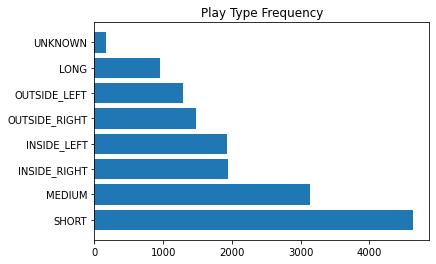

In [32]:
pt_x_ind = ['SHORT', 'MEDIUM', 'INSIDE_RIGHT', 'INSIDE_LEFT',
            'OUTSIDE_RIGHT', 'OUTSIDE_LEFT', 'LONG', 'UNKNOWN']

plt.barh(pt_x_ind, pass_run_plays_df["playType"].value_counts())
plt.title("Play Type Frequency")
plt.show()

In [33]:
pass_run_plays_df["playType"].value_counts()/len(pass_run_plays_df)

SHORT            0.287646
MEDIUM           0.194059
INSIDE_RIGHT     0.120380
INSIDE_LEFT      0.119573
OUTSIDE_RIGHT    0.091168
OUTSIDE_LEFT     0.079571
LONG             0.059477
UNKNOWN          0.010233
Name: playType, dtype: float64

In [34]:
sum(pass_run_plays_df["playType"].value_counts()/len(pass_run_plays_df))

0.9621061771272635